In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Data Load

In [22]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


- R&D Spend, Administration, Marketing Spend 정보를 이용하여 Profit 예측

In [14]:
startups = dataset.values

# 2. X와 y 분리

In [15]:
X = startups[:,:3]
y = startups[:,-1]

In [12]:
print(X.shape, y.shape)

(50, 3) (50,)


# 3. Training data와 Test data 분리

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# X의 행의 수: sample의 수 (training과 test의 sample수는 다름(동일할 수 도 있음))
# X의 열의 수: 특징의 수 (R&D Spend, Administration, Marketing Spend), (training과 test의 특징 수는 반드시 동일해야 함)

(37, 3) (13, 3) (37,) (13,)


# 4. Linear regression 학습

In [17]:
from sklearn.linear_model import LinearRegression
# LinearRegression model 생성 (profit을 예측하기 위한 lineasr regression model 생성)
lr = LinearRegression()
# Training data를 통해 model을 학생
lr.fit(X_train, y_train)
# fit을 실행한 후, model 생성 완료

LinearRegression()

# 5. Prediction (X_test값을 model의 입력으로 하여, Profit 값 예측하기)

In [19]:
pred = lr.predict(X_test)
# X_test.shape = (13,3)
# X_test는 R&D Spend, Administration, Marketing Spend 3개의 특징을 가진 13개의 sample data(X)
# pred: 13개 Sample data에 대한 예측값
# X_test에 대한 실제 값(target, 정답)은 y_test
# pred와 y_test를 비교하여, 성능을 평가할 수 있음
print(pred.shape)
print(pred)

(13,)
[126432.21354192  85502.50398527  99003.12574173  46163.70173114
 128645.99157053  52188.50492673 108562.55837568 100459.7619706
  97565.18114776 112618.38433624 128589.18988353 174378.83280484
  93459.27699416]


# 6. Regression model 성능 평가하기

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test,pred)
mae = mean_absolute_error(y_test,pred)
r2 = r2_score(y_test,pred)

print('MSE: ', mse)
print('MAE: ', mae)
print('R2:  ', r2)
# MSE, MAE는 다른 model과 성능을 비교할 때는 좋은 척도이나, 단독으로 model을 평가하기는 애매함
# R2는 주로 0보다 크고, 1보다 같거나 작은 값이므로, classification에서 accuracy와 유사한 정보로, 단독으로 model을 평가하기 좋음

MSE:  86644383.23852435
MAE:  7432.7855845989125
R2:   0.9193827032400599


# 7. 결과 시각화

- y_test와 pred 한 번에 시각화하기

Text(0.5, 1.0, 'Linear Regression')

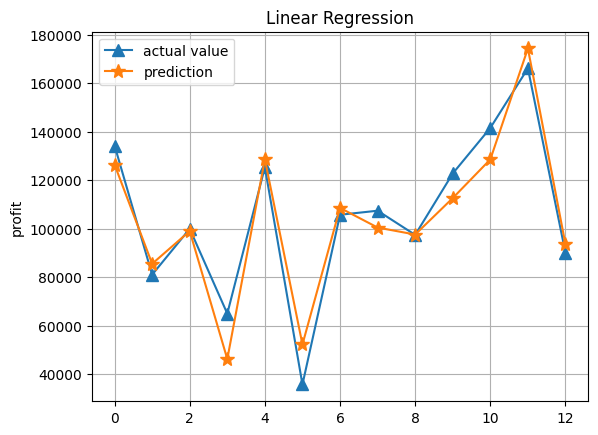

In [34]:
plt.plot(y_test,marker='^',markersize=8,label='actual value') # 정답, target, actual value
plt.plot(pred,marker='*',markersize=10,label='prediction')   # 예측값, prediction
plt.legend()
plt.grid()
plt.ylabel('profit')
plt.title('Linear Regression')